In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Prepare Data

In [2]:
# Load features from CSV files into dataframes
df_30s = pd.read_csv("features_30_sec.csv")
df_3s = pd.read_csv("features_3_sec.csv")

# Extract features and labels
X_30s = df_30s.drop(columns=['filename', 'length', 'label'])
X_3s = df_3s.drop(columns=['filename', 'length', 'label'])
y_30s = df_30s['label']
y_3s = df_3s['label']

# Split data into training and test sets
X_train_30s, X_test_30s, y_train_30s, y_test_30s = train_test_split(X_30s, y_30s, test_size=0.2, random_state=42)
X_train_3s, X_test_3s, y_train_3s, y_test_3s = train_test_split(X_3s, y_3s, test_size=0.2, random_state=42)

In [3]:
num_features_30s = X_30s.shape[1]
num_features_3s = X_3s.shape[1]

print(f"Number of features in 30 sec segments data: {num_features_30s}")
print(f"Number of features in 3 sec segments data: {num_features_3s}")

Number of features in 30 sec segments data: 57
Number of features in 3 sec segments data: 57


In [4]:
feature_names_30s = X_30s.columns.tolist()
feature_names_3s = X_3s.columns.tolist()

print("Features in 30 sec segments data:")
print(feature_names_30s)

print("\nFeatures in 3 sec segments data:")
print(feature_names_3s)

Features in 30 sec segments data:
['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']

Features in 3 sec segments data:
['chroma_stft_mean', 'chroma_stft_var', 'rms_m

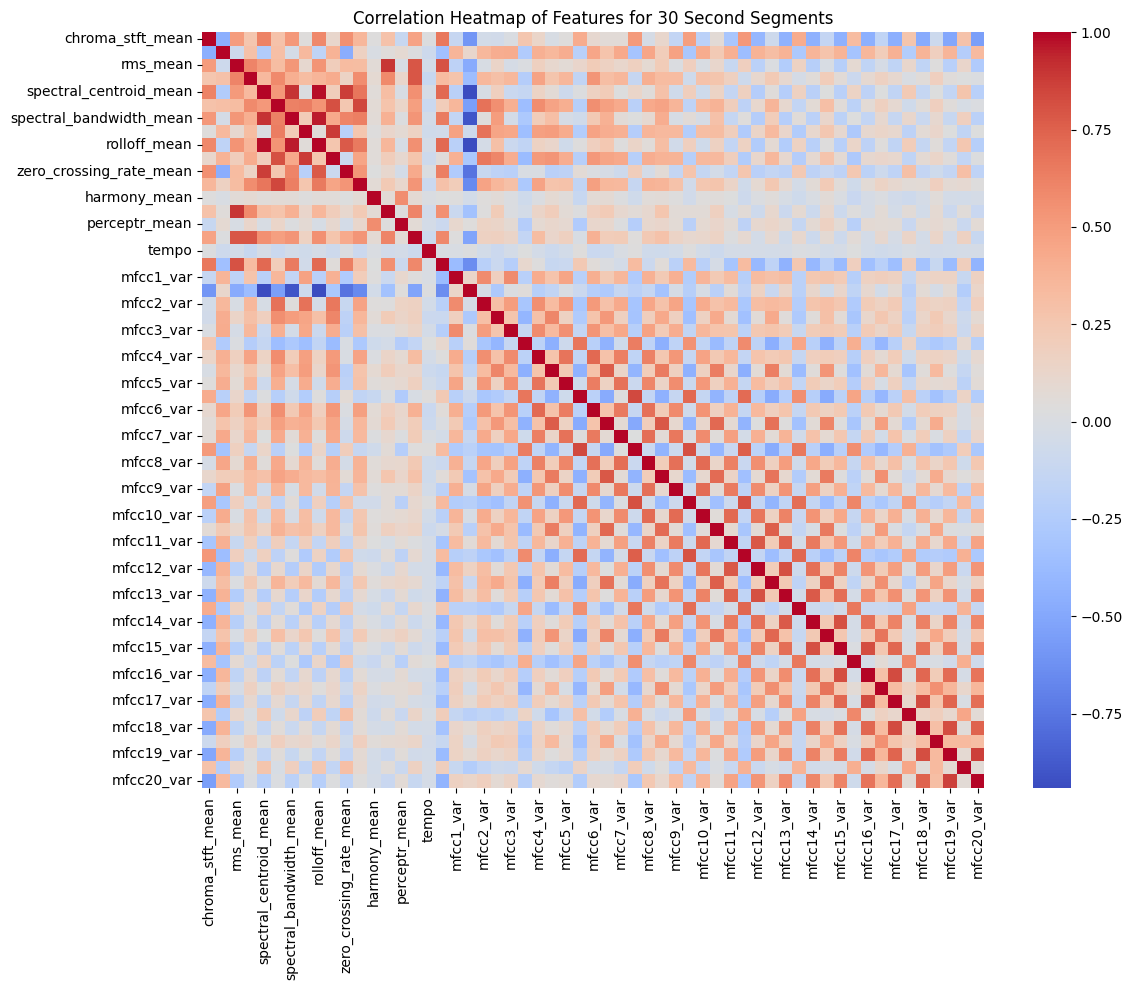

In [5]:
correlation_matrix = X_30s.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Heatmap of Features for 30 Second Segments')
plt.tight_layout()
plt.show()

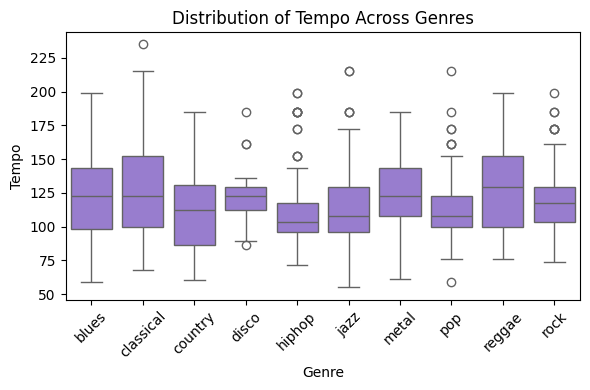

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='tempo', data=df_30s, color='mediumpurple')
plt.title('Distribution of Tempo Across Genres')
plt.xlabel('Genre')
plt.ylabel('Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Convert categorical labels into numeric values
label_encoder = LabelEncoder()
y_train_30s = label_encoder.fit_transform(y_train_30s)
y_test_30s = label_encoder.transform(y_test_30s)
y_train_3s = label_encoder.fit_transform(y_train_3s)
y_test_3s = label_encoder.transform(y_test_3s)

In [ ]:
# Apply scaling
scaler = StandardScaler()
X_train_30s = scaler.fit_transform(X_train_30s)
X_test_30s = scaler.transform(X_test_30s)
X_train_3s = scaler.fit_transform(X_train_3s)
X_test_3s = scaler.transform(X_test_3s)

In [ ]:
# Apply PCA
pca = PCA(n_components=30)
X_train_30s_pca = pca.fit_transform(X_train_30s)
X_test_30s_pca = pca.transform(X_test_30s)
X_train_3s_pca = pca.fit_transform(X_train_3s)
X_test_3s_pca = pca.transform(X_test_3s)

explained_variance = pca.explained_variance_ratio_.sum()
print(f"Total Variance Explained by 30 Components: {explained_variance * 100:.2f}%")

Total Variance Explained by 30 Components: 90.02%


## Train Models

In [ ]:
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, segment_type):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict labels
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Evaluate performance
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    print(f"Performance for {segment_type} segments:")
    print(f"Accuracy on training set: {accuracy_train:.4f}")
    print(f"Accuracy on testing set: {accuracy_test:.4f}\n")

### K-Nearest Neighbors (KNN)

In [ ]:
param_grid_knn = {
    'n_neighbors': np.arange(3, 20, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

# Perform grid search with 5-fold cross-validation
knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
# Train and find best hyperparameters for 30 sec segments
grid_search_knn.fit(X_train_30s, y_train_30s)
best_params_30s = grid_search_knn.best_params_
print("Best hyperparameters for 30 sec segments:")
print(best_params_30s)
print("")

# Train and find best hyperparameters for 3 sec segments
grid_search_knn.fit(X_train_3s, y_train_3s)
best_params_3s = grid_search_knn.best_params_
print("Best hyperparameters for 3 sec segments:")
print(best_params_3s)
print("")

# Initialize and evaluate KNN with best parameters
knn_classifier_30s = KNeighborsClassifier(**best_params_30s)
knn_classifier_3s = KNeighborsClassifier(**best_params_3s)

evaluate_classifier(knn_classifier_30s, X_train_30s, y_train_30s, X_test_30s, y_test_30s, "30 sec")
evaluate_classifier(knn_classifier_3s, X_train_3s, y_train_3s, X_test_3s, y_test_3s, "3 sec")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for 30 sec segments:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for 3 sec segments:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Performance for 30 sec segments:
Accuracy on training set: 0.9988
Accuracy on testing set: 0.6850

Performance for 3 sec segments:
Accuracy on training set: 0.9992
Accuracy on testing set: 0.9374



In [ ]:
# Train and find best hyperparameters for 30 sec segments using PCA
grid_search_knn.fit(X_train_30s_pca, y_train_30s)
best_params_30s = grid_search_knn.best_params_
print("Best hyperparameters for 30 sec segments:")
print(best_params_30s)
print("")

# Train and find best hyperparameters for 3 sec segments using PCA
grid_search_knn.fit(X_train_3s_pca, y_train_3s)
best_params_3s = grid_search_knn.best_params_
print("Best hyperparameters for 3 sec segments:")
print(best_params_3s)
print("")

# Initialize and evaluate KNN with best parameters
knn_classifier_30s = KNeighborsClassifier(**best_params_30s)
knn_classifier_3s = KNeighborsClassifier(**best_params_3s)

evaluate_classifier(knn_classifier_30s, X_train_30s_pca, y_train_30s, X_test_30s_pca, y_test_30s, "30 sec")
evaluate_classifier(knn_classifier_3s, X_train_3s_pca, y_train_3s, X_test_3s_pca, y_test_3s, "3 sec")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for 30 sec segments:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for 3 sec segments:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

Performance for 30 sec segments:
Accuracy on training set: 0.9988
Accuracy on testing set: 0.6650

Performance for 3 sec segments:
Accuracy on training set: 0.9992
Accuracy on testing set: 0.8794



### Support Vector Machine (SVM)

In [ ]:
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],

}

# Perform grid search with 5-fold cross-validation
svm_classifier = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
# Train and find best hyperparameters for 30 sec segments
grid_search_svm.fit(X_train_30s, y_train_30s)
best_params_30s = grid_search_svm.best_params_
print("Best hyperparameters for 30 sec segments:")
print(best_params_30s)
print("")

# Train and find best hyperparameters for 3 sec segments
grid_search_svm.fit(X_train_3s, y_train_3s)
best_params_3s = grid_search_svm.best_params_
print("Best hyperparameters for 3 sec segments:")
print(best_params_3s)
print("")

# Initialize and evaluate SVM with best parameters
svm_classifier_30s = SVC(**best_params_30s, random_state=42)
svm_classifier_3s = SVC(**best_params_3s, random_state=42)

evaluate_classifier(svm_classifier_30s, X_train_30s, y_train_30s, X_test_30s, y_test_30s, "30 sec")
evaluate_classifier(svm_classifier_3s, X_train_3s, y_train_3s, X_test_3s, y_test_3s, "3 sec")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters for 30 sec segments:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters for 3 sec segments:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Performance for 30 sec segments:
Accuracy on training set: 0.9988
Accuracy on testing set: 0.7300

Performance for 3 sec segments:
Accuracy on training set: 0.9970
Accuracy on testing set: 0.9314



In [ ]:
# Train and find best hyperparameters for 30 sec segments using PCA
grid_search_svm.fit(X_train_30s_pca, y_train_30s)
best_params_30s = grid_search_svm.best_params_
print("Best hyperparameters for 30 sec segments:")
print(best_params_30s)
print("")

# Train and find best hyperparameters for 3 sec segments using PCA
grid_search_svm.fit(X_train_3s_pca, y_train_3s)
best_params_3s = grid_search_svm.best_params_
print("Best hyperparameters for 3 sec segments:")
print(best_params_3s)
print("")

# Initialize and evaluate SVM with best parameters
svm_classifier_30s = SVC(**best_params_30s, random_state=42)
svm_classifier_3s = SVC(**best_params_3s, random_state=42)

evaluate_classifier(svm_classifier_30s, X_train_30s_pca, y_train_30s, X_test_30s_pca, y_test_30s, "30 sec")
evaluate_classifier(svm_classifier_3s, X_train_3s_pca, y_train_3s, X_test_3s_pca, y_test_3s, "3 sec")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters for 30 sec segments:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters for 3 sec segments:
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Performance for 30 sec segments:
Accuracy on training set: 0.9938
Accuracy on testing set: 0.7000

Performance for 3 sec segments:
Accuracy on training set: 0.9969
Accuracy on testing set: 0.8984



### Random Forest (RF)

In [ ]:
param_grid_rf = {
    'n_estimators': np.arange(50, 101, 10),
    'max_depth': np.arange(5, 21, 5),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True]
}

# Perform grid search with 5-fold cross-validation
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
# Train and find best hyperparameters for 30 sec segments
grid_search_rf.fit(X_train_30s, y_train_30s)
best_params_30s = grid_search_rf.best_params_
print("Best hyperparameters for 30 sec segments:")
print(best_params_30s)
print("")

# Train and find best hyperparameters for 3 sec segments
grid_search_rf.fit(X_train_3s, y_train_3s)
best_params_3s = grid_search_rf.best_params_
print("Best hyperparameters for 3 sec segments:")
print(best_params_3s)
print("")

# Initialize and evaluate RF with best parameters
rf_classifier_30s = RandomForestClassifier(**best_params_30s, random_state=42)
rf_classifier_3s = RandomForestClassifier(**best_params_3s, random_state=42)

evaluate_classifier(rf_classifier_30s, X_train_30s, y_train_30s, X_test_30s, y_test_30s, "30 sec")
evaluate_classifier(rf_classifier_3s, X_train_3s, y_train_3s, X_test_3s, y_test_3s, "3 sec")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters for 30 sec segments:
{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters for 3 sec segments:
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}

Performance for 30 sec segments:
Accuracy on training set: 0.9988
Accuracy on testing set: 0.6600

Performance for 3 sec segments:
Accuracy on training set: 0.9992
Accuracy on testing set: 0.8804



In [ ]:
# Train and find best hyperparameters for 30 sec segments using PCA
grid_search_rf.fit(X_train_30s_pca, y_train_30s)
best_params_30s = grid_search_rf.best_params_
print("Best hyperparameters for 30 sec segments:")
print(best_params_30s)
print("")

# Train and find best hyperparameters for 3 sec segments using PCA
grid_search_rf.fit(X_train_3s_pca, y_train_3s)
best_params_3s = grid_search_rf.best_params_
print("Best hyperparameters for 3 sec segments:")
print(best_params_3s)
print("")

# Initialize and evaluate RF with best parameters
rf_classifier_30s = RandomForestClassifier(**best_params_30s, random_state=42)
rf_classifier_3s = RandomForestClassifier(**best_params_3s, random_state=42)

evaluate_classifier(rf_classifier_30s, X_train_30s_pca, y_train_30s, X_test_30s_pca, y_test_30s, "30 sec")
evaluate_classifier(rf_classifier_3s, X_train_3s_pca, y_train_3s, X_test_3s_pca, y_test_3s, "3 sec")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters for 30 sec segments:
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters for 3 sec segments:
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Performance for 30 sec segments:
Accuracy on training set: 0.9988
Accuracy on testing set: 0.6650

Performance for 3 sec segments:
Accuracy on training set: 0.9992
Accuracy on testing set: 0.8038



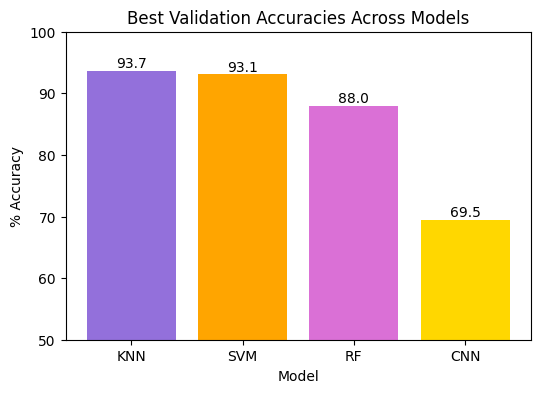

In [3]:
models = ['KNN', 'SVM', 'RF', 'CNN']
accuracies = [93.7, 93.1, 88.0, 69.5]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['mediumpurple', 'orange', 'orchid', 'gold'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center')

plt.xlabel('Model')
plt.ylabel('% Accuracy')
plt.title('Best Validation Accuracies Across Models')
plt.ylim(50, 100)
plt.show()